In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from sklearn.metrics import mean_squared_error
from numpy import array
from numpy import savetxt

In [2]:

import pandas as pd
df = pd.read_csv('C:\\Users\\arjun\\Downloads\\ethereum_price.csv')

In [3]:
df = df[['Closing Price (USD)']]

In [4]:
data = []
for i in df['Closing Price (USD)']:
  if(i<900):
    data.append(i)
hist = []
target = []
length = 8
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)


In [5]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

In [6]:
hist_scaled = hist.reshape((len(hist), length, 1))
print(hist_scaled.shape)


(1875, 8, 1)


In [7]:
X_train = hist_scaled[:1820,:,:]
X_test = hist_scaled[1820:,:,:]
y_train = target[:1820,:]
y_test = target[1820:,:]

In [8]:
newmodel = tf.keras.Sequential()
newmodel.add(layers.LSTM(units=64, return_sequences= True, input_shape=(X_train.shape[1],1)))
newmodel.add(layers.LSTM(units=64, return_sequences=True))
newmodel.add(layers.LSTM(units=64, return_sequences=True))
newmodel.add(layers.Dropout(0.2))
newmodel.add(layers.LSTM(units=64))
newmodel.add(layers.Dropout(0.2))

newmodel.add(layers.Dense(units=1))
newmodel.summary()
newmodel.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8, 64)             16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 8, 64)             33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 8, 64)             33024     
_________________________________________________________________
dropout (Dropout)            (None, 8, 64)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [9]:
history = newmodel.fit(X_train, y_train, epochs=120, batch_size=16)

Train on 1820 samples
Epoch 1/120
1820/1820 [==============================] - 16s 9ms/sample - loss: 68540.1093
Epoch 2/120
1820/1820 [==============================] - 3s 2ms/sample - loss: 65278.2968
Epoch 3/120
1820/1820 [==============================] - 3s 2ms/sample - loss: 62838.4598
Epoch 4/120
1820/1820 [==============================] - 3s 2ms/sample - loss: 60547.2465 0s - loss:
Epoch 5/120
1820/1820 [==============================] - 3s 2ms/sample - loss: 58334.1415
Epoch 6/120
1820/1820 [==============================] - 3s 2ms/sample - loss: 56221.2690
Epoch 7/120
1820/1820 [==============================] - 3s 2ms/sample - loss: 54173.4488 0s - loss: 54820.
Epoch 8/120
1820/1820 [==============================] - 3s 2ms/sample - loss: 52195.1294
Epoch 9/120
1820/1820 [==============================] - 3s 2ms/sample - loss: 50252.7375
Epoch 10/120
1820/1820 [==============================] - 3s 2ms/sample - loss: 48591.6041
Epoch 11/120
1820/1820 [=======================

1820/1820 [==============================] - 3s 2ms/sample - loss: 5268.7719
Epoch 91/120
1820/1820 [==============================] - 3s 1ms/sample - loss: 5179.3209
Epoch 92/120
1820/1820 [==============================] - 3s 2ms/sample - loss: 5066.2112
Epoch 93/120
1820/1820 [==============================] - 3s 2ms/sample - loss: 4940.9826
Epoch 94/120
1820/1820 [==============================] - 3s 1ms/sample - loss: 4833.8991
Epoch 95/120
1820/1820 [==============================] - 2s 1ms/sample - loss: 4547.4021
Epoch 96/120
1820/1820 [==============================] - 2s 1ms/sample - loss: 4639.6514
Epoch 97/120
1820/1820 [==============================] - 2s 1ms/sample - loss: 4487.4582
Epoch 98/120
1820/1820 [==============================] - 2s 1ms/sample - loss: 4473.9598
Epoch 99/120
1820/1820 [==============================] - 2s 1ms/sample - loss: 4219.0206
Epoch 100/120
1820/1820 [==============================] - 2s 1ms/sample - loss: 4147.4912
Epoch 101/120
1820/182

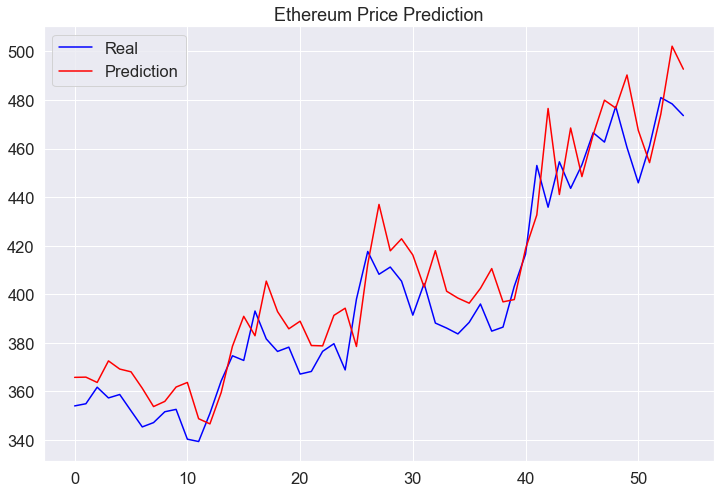

In [10]:
pred = newmodel.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Ethereum Price Prediction')
plt.legend()
plt.show()

In [11]:
def predictor(model,X_train,n):
    x_input = X_train[-1]
    n_steps=8
    n_features=1
    temp_input=list(x_input)
    lst_output=[]
    i=0
    while(i<n):
        if(len(temp_input)>8):
            #print("new this")
            x_input=np.array(temp_input[1:])
              #print("{} day input {}".format(i,x_input.shape))
            #print(x_input)
            x_input = x_input.reshape((1, n_steps, n_features))
              #print(x_input.shape)
            #print(x_input)
            x_input=np.asarray(x_input).astype(np.float64)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.append(yhat)
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.append(yhat)
            i=i+1
            
        else:
            #print("inside else")
            x_input = x_input.reshape((1, n_steps, n_features))
              #print(x_input.shape)
            yhat = model.predict(x_input, verbose=0)
            print("0 day output",yhat)
            temp_input.append(yhat)
            #print(len(temp_input))
            lst_output.append(yhat)
            i=i+1
    return lst_output



In [12]:
n = int(input("Which day's value you wanna know:"))

Which day's value you wanna know:5


In [13]:
t = predictor(newmodel,X_train,n)

0 day output [[355.0469]]
1 day output [[366.11514]]
2 day output [[380.76956]]
3 day output [[395.13205]]
4 day output [[408.47678]]


In [17]:
t =np.array(t)
t = t.reshape(n,1)

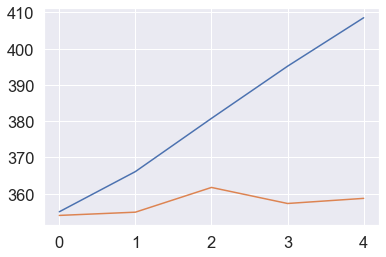

In [18]:
plt.plot(t)
plt.plot(y_test[:n])

In [21]:
newmodel.save("ethereum_model.h5")

In [22]:
history1 = newmodel.fit(X_train, y_train, epochs=30, batch_size=16)

Train on 1820 samples
Epoch 1/30
1820/1820 [==============================] - 3s 1ms/sample - loss: 2318.7602
Epoch 2/30
1820/1820 [==============================] - 3s 2ms/sample - loss: 2322.7045
Epoch 3/30
1820/1820 [==============================] - 3s 2ms/sample - loss: 2312.6999
Epoch 4/30
1820/1820 [==============================] - 3s 1ms/sample - loss: 2120.5517
Epoch 5/30
1820/1820 [==============================] - 3s 1ms/sample - loss: 2206.0328
Epoch 6/30
1820/1820 [==============================] - 2s 1ms/sample - loss: 2005.2089
Epoch 7/30
1820/1820 [==============================] - 3s 1ms/sample - loss: 2017.2149
Epoch 8/30
1820/1820 [==============================] - 2s 1ms/sample - loss: 2072.2469
Epoch 9/30
1820/1820 [==============================] - 2s 1ms/sample - loss: 1984.9874
Epoch 10/30
1820/1820 [==============================] - 2s 1ms/sample - loss: 1980.4292
Epoch 11/30
1820/1820 [==============================] - 2s 1ms/sample - loss: 1942.7775
Epoch 12

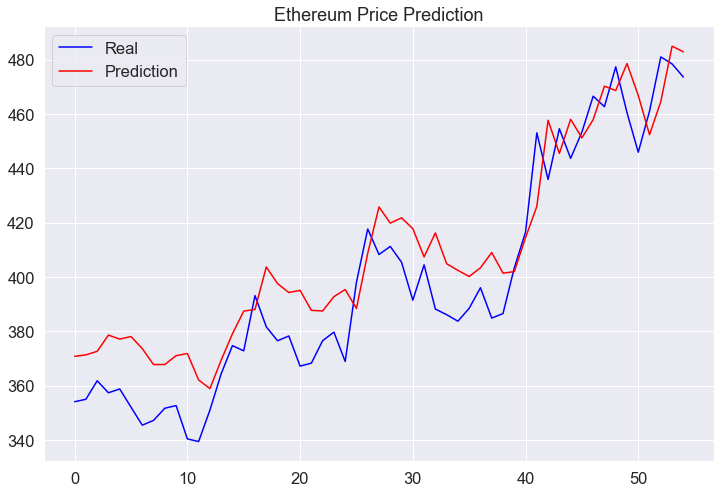

In [23]:
pred = newmodel.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Ethereum Price Prediction')
plt.legend()
plt.show()

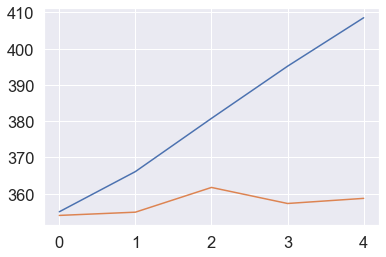

In [24]:
plt.plot(t)
plt.plot(y_test[:n])

In [34]:
val=X_test[:,:,0]

In [41]:
savetxt("ethereum_future.txt",val)

In [44]:
val.shape

(55, 8)

In [46]:
savetxt("ethereum_actual.txt",y_test)